## Import library & Load data

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Import Complete!!!")

Import Complete!!!


In [79]:
data = pd.read_csv("train.csv")
data = data.drop("PassengerId", axis=1)
print(data.shape)
print(data.isnull().sum())
data.head()

(891, 11)
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [80]:
survived = data.loc[data["Survived"] == 1]
notsurvived = data.loc[data["Survived"] == 0]

num_column = ["Age", "Fare"]
cat_column = ["Pclass", "Sex", "Embarked", "SibSp", "Parch"]
untype_column = ["Name", "Ticket", "Cabin"]

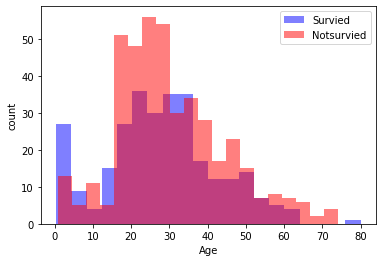

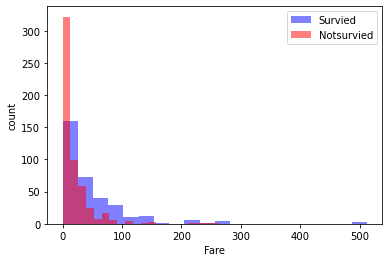

In [81]:
for i in num_column:
    plt.hist(survived[i], label="Survied", color="b", bins=20, alpha=0.5)
    plt.hist(notsurvived[i], label="Notsurvied", color="r", bins=20, alpha=0.5)
    plt.xlabel(i)
    plt.ylabel("count")
    plt.legend()
    plt.show()


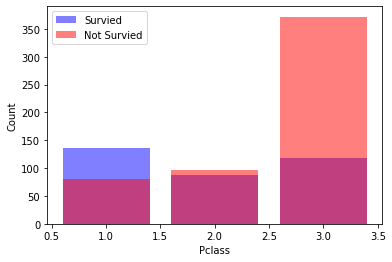

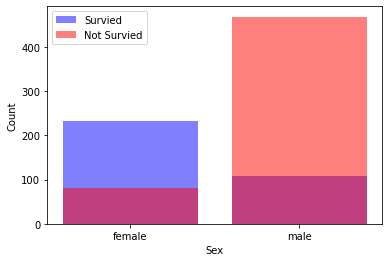

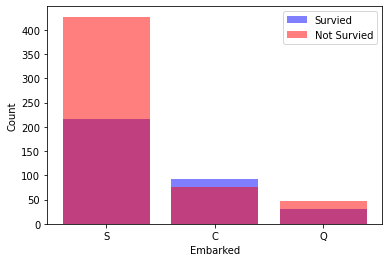

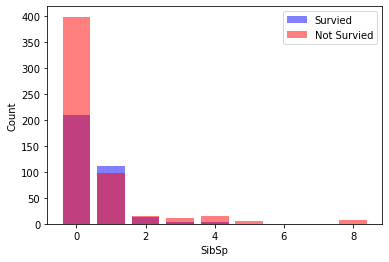

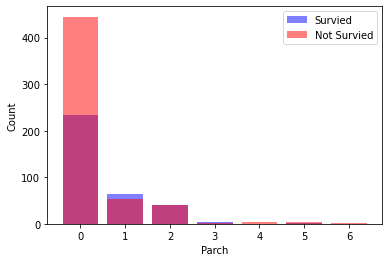

In [82]:
for i in cat_column:
    plt.bar(survived[i].value_counts().index, survived[i].value_counts(), label="Survied", color="b", alpha=0.5)
    plt.bar(notsurvived[i].value_counts().index, notsurvived[i].value_counts(), label="Not Survied", color="r", alpha=0.5)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

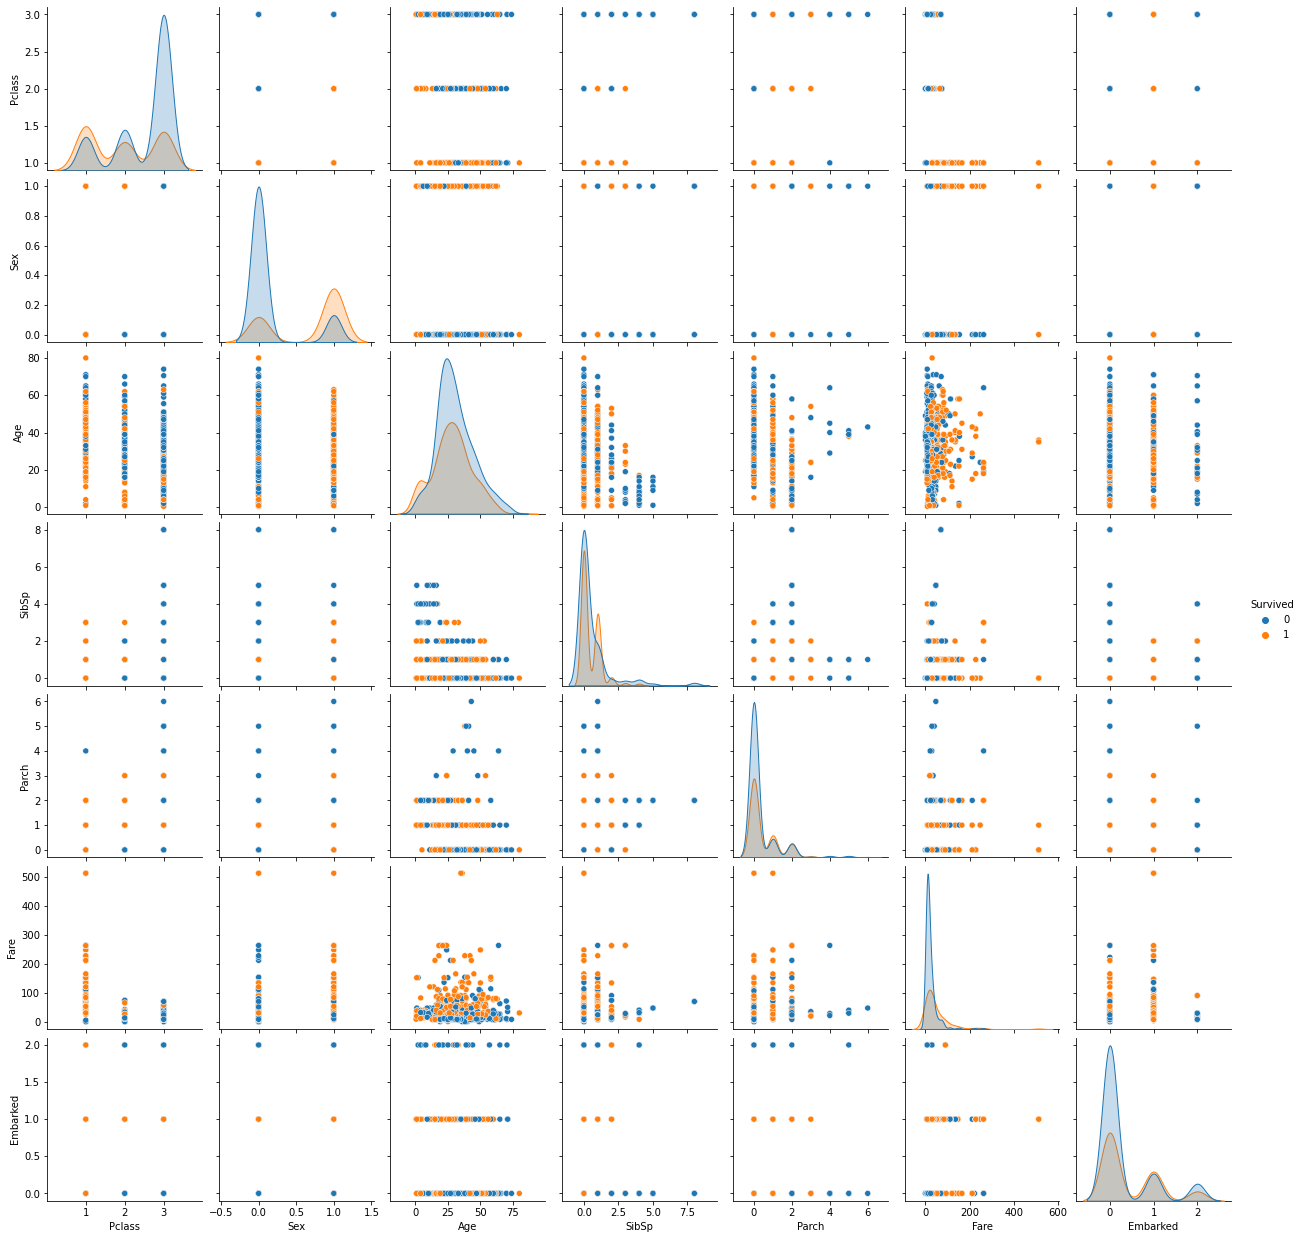

In [83]:
for c in ["Sex", "Embarked"]:
    i = 0
    for x in data[c].value_counts().index:
        data[c].replace(x, int(i), inplace=True)
        i += 1

sns.pairplot(data, hue="Survived")

## Prepare data

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
print(data.isnull().sum())
data.head()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [100]:
data["Age"].fillna(data["Age"].dropna().median(), inplace=True)
data.dropna(subset=["Embarked"], inplace=True)

x = data.drop(["Survived", "Name", "Ticket", "Cabin"], axis=1)
y = data.Survived

print(x.shape)
print(x.isnull().sum())
print(y.shape)
print(y.isnull().sum())

x.head()

(889, 7)
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
(889,)
0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0


In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("Train set :", x_train.shape, y_train.shape)
print("Test set :", x_test.shape, y_test.shape)

Train set : (711, 7) (711,)
Test set : (178, 7) (178,)


## Train & Evaluate model

Import evaluate function

In [109]:
from sklearn.metrics import plot_confusion_matrix

1. Logistic Regression

Score on train set :  0.79 %
Score on test set :  0.84 %


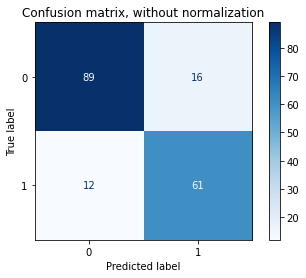

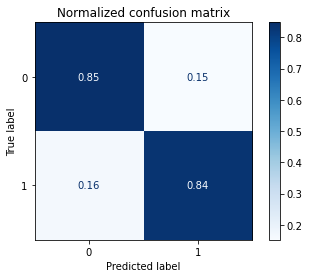

In [114]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1, max_iter=2000)
logreg.fit(x_train, y_train)
print("Score on train set : ", logreg.score(x_train, y_train).round(2), "%")
print("Score on test set : ", logreg.score(x_test, y_test).round(2), "%")

#plot confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", "true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

2. Decision Tree

Score on train set :  0.83 %
Score on test set :  0.85 %


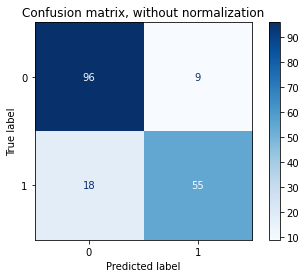

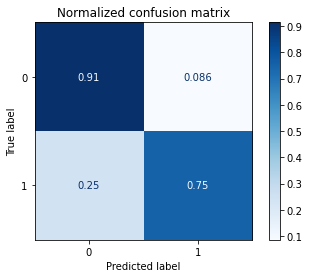

In [133]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=1, max_depth=3)
decision_tree.fit(x_train, y_train)
print("Score on train set : ", decision_tree.score(x_train, y_train).round(2), "%")
print("Score on test set : ", decision_tree.score(x_test, y_test).round(2), "%")

#plot confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", "true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(decision_tree, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()


3. Random Forest

Score on train set :  0.83 %
Score on test set :  0.82 %


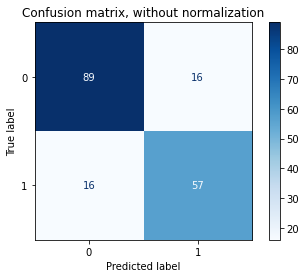

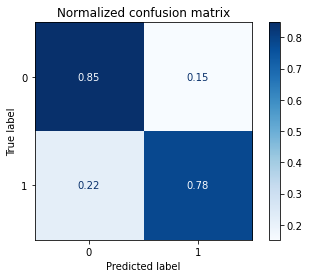

In [155]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=1, max_depth= 4, n_estimators=6)
randomforest.fit(x_train, y_train)
print("Score on train set : ", randomforest.score(x_train, y_train).round(2), "%")
print("Score on test set : ", randomforest.score(x_test, y_test).round(2), "%")

#plot confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", "true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(randomforest, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()